# STAT207 Final Project - Heart Disease Classifier


Alejandra (netid), Nathan (netid), Shriya (shriyad2)

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [10]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

For our final project, we are examining a heart disease dataset to build a classifier that predicts whether someone has heart disease or not based on a few factors. Our primary research goal is to build a predictive model that will effectively predict heart disease in new datasets. For this project specifically, we are going to use five explanatory variables: BMI, smoking, physical health, sleep time, and alcohol drinking to predict heart disease. Based on these explanatory variables, our secondary research goal is to yield reliable interpretable insights about the nature between the variables (both explanatory and response) in our dataset. The motive that someone might have for wanting to build this model is to be able to improve our healthcare services and take more preventative measures for patients that are at risk or could be at risk of heart disease. By being able to predict the risk of heart disease or potential of heart disease within patients earlier, doctors could be able to treat the matter or be cautious of it before it becomes worse. Based on these motivations, doctors and scientists would find these predictive models useful since they could study how these risk factors contribute to the potential of heart disease and be able to take more preventative measures for their patients. As a result, this person would desire a classifier that was very accurate in predicting positives and a model that has a very low percentage of false negatives (there is more risk if our model predicts that someone does not have heart disease when they do). 

## 2. Dataset Discussion

In [3]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


heart_df is a dataset with 18 columns of various observations including the person's BMI, whether they smoke or not, whether they drink or not, and many more. 

In [4]:
heart_df.shape[0]

319795

This dataset has 319795 rows pre-cleaning. 

We received this dataset from Kaggle.com (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/) and we downloaded the csv file on November 13, 2023. The data for the dataset was collected from the CDC, as a part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As a result, the rows in the dataset represent U.S. residents that participated in the telephone survey in 2020 from any of the 50 states, DC, or three U.S territories. The dataset does not include ALL types of observations that could have been considered in this dataset. Although they considered many health factors, there definitely are some more that they could've considered such as diving deeper into specific types of physical activity and considering height and weight. This impacts the types of actions that the person in my research motivation might take by either accounting for these factors in their later conclusions or by looking for more data or making data that includes these factors if they want to include them in their classifier/models.

The variable that we intend to use as our response variable is heart disease. In the dataset, this variable is a categorical variable with two levels which indicates whether the person has heart disease or not. Similarly, our classifier will predict whether a person has heart disease or not. 

The five explanatory variables that we have chosen are BMI, smoking, alcohol drinking, physical activity and sleep time. BMI is a numerical variable that shows a person's body mass index which is a person's weight divided by the square of a person's height. Smoking is a categorical variable with two levels that indicates whether a person smokes or not. Alcohol drinking is a categorical variable with two levels that indicates whether the person drinks alcohol frequently or not. Physical activity is another categorical variable with two levels that indicates whether the person engages in physical activity or not (it is not specified exactly what physical activity specifically entails, but we will regard it as engages in some sort of physical activity regularly). The last variable that we are examining is sleep time which is a numerical variable that indicates how many hours of sleep the person gets per night on average. 

We chose to focus on these five explanatory variables due to some prior knowledge that we have. In science classes, we have heard that engaging in smoking or frequent alcohol drinking and not engaging in regular physical activity can contribute to health risks later on in life such as heart disease. As a result, we want to examine whether this rings true by examining these factors that are provided in the dataset alongside variables such as BMI and sleep time to see if it's able to accurately predict whether a person has heart disease or not.

## 3. Dataset Cleaning

In [5]:
heart_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Based on examining the data types of all the column variables, we can say that there are no implicit missing values for the numerical variables since they have all casted to float64s without any problems. Now, we will do further investigation for the categorical variables. 

In [6]:
heart_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Based on the sum of all null values in the dataset, we can also say that there are no explicit missing values within the dataset since there are no null values in any of the columns. As a result, we do not need to drop any rows in the dataset.

In [7]:
smoking_counts = heart_df["Smoking"].value_counts()
smoking_counts

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

Within the categorical variable smoking, there are no levels that have few observations. We will not drop any levels here.

In [8]:
alcohol_counts = heart_df["AlcoholDrinking"].value_counts()
alcohol_counts

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Within the categorical variable alcoholdrinking, although one level has significantly less amount of observations, there are still enough observations to warrant keeping the level. As a result, we will not drop any levels here either.

In [9]:
physical_counts = heart_df["PhysicalActivity"].value_counts()
physical_counts

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

Similar to alcoholdrinking, within the categorical variable physicalactivity, although one level has significantly less amount of observations, there are still enough observations to warrant keeping the level. As a result, we will not drop any levels here either.

<Axes: xlabel='BMI', ylabel='SleepTime'>

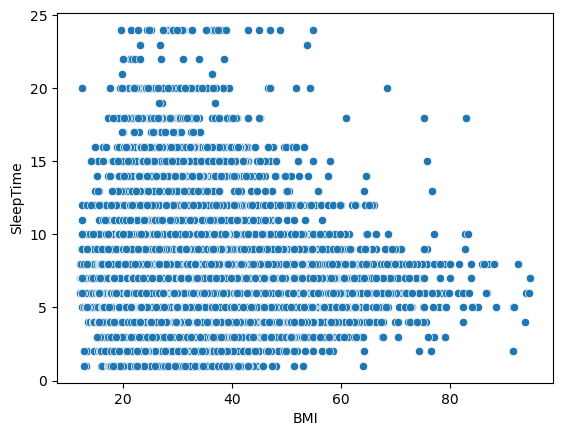

In [13]:
sns.scatterplot(x = "BMI", y = "SleepTime", data = heart_df)

There does not seem to be any significant outliers in the scatterplot between BMI and SleepTime. There are definitely a few values that do not fit the general trend such as the observation with a BMI of approximately 65 and SleepTime of 20, but these are not extreme enough to warrant dropping. One pro of dropping these outliers are that our end model would follow more of the general trend of the data. On the other hand, some cons of dropping these outliers are that our end model would be less likely to predict points with these more extreme values and wouldn't account for as much variability in data. We will decide to keep these outliers in our data since we want our model to account for variability in the data.

We did not discover any other data cleaning ideas. Since there were no implicit or explicit null values, as well as no extreme outliers or low observations in any of our categorical variables (largely since there are only two levels in all the categorical explanatory variables that we are studying), there is not much else to do to clean our data. One thing we could have looked at is the uncommon values of sleeptime that range beyond 12-15 hours.

## 4. Preliminary Analysis

<Axes: xlabel='Smoking'>

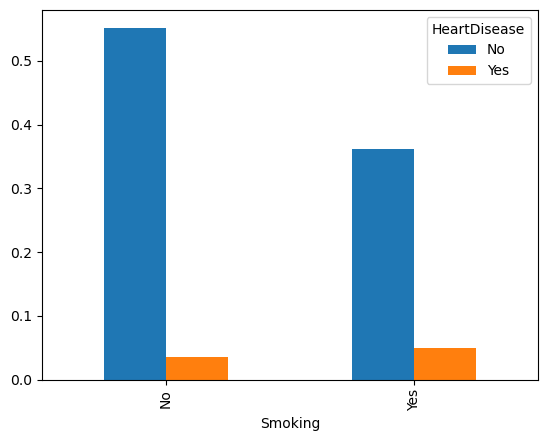

In [16]:
smoking_cross = pd.crosstab(heart_df["Smoking"], heart_df["HeartDisease"], normalize = True)
smoking_cross.plot.bar()

<Axes: xlabel='AlcoholDrinking'>

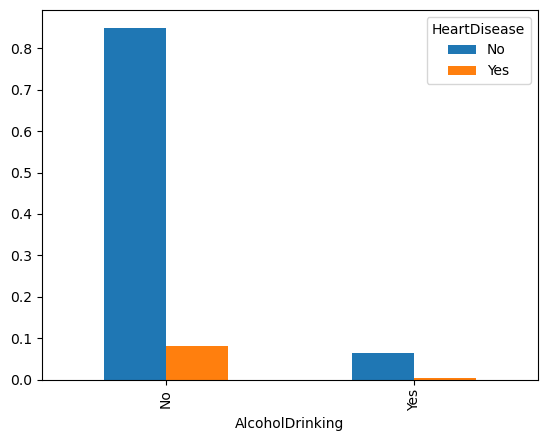

In [17]:
alcohol_cross = pd.crosstab(heart_df["AlcoholDrinking"], heart_df["HeartDisease"], normalize = True)
alcohol_cross.plot.bar()

<Axes: xlabel='PhysicalActivity'>

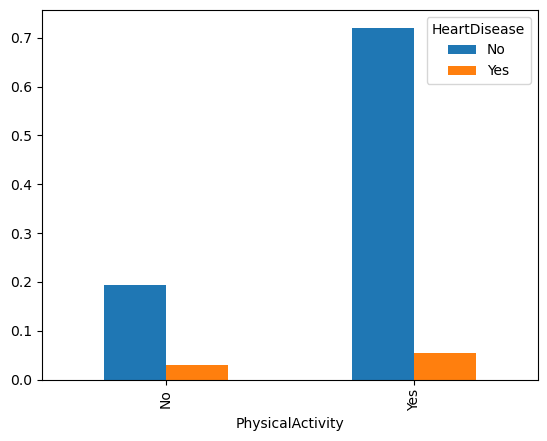

In [18]:
activity_cross = pd.crosstab(heart_df["PhysicalActivity"], heart_df["HeartDisease"], normalize = True)
activity_cross.plot.bar()

<Axes: xlabel='SleepTime', ylabel='HeartDisease'>

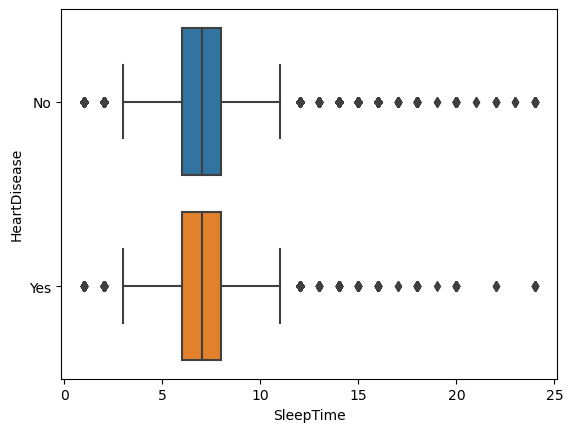

In [20]:
sns.boxplot(x = "SleepTime", y = "HeartDisease", data = heart_df)

<Axes: xlabel='BMI', ylabel='HeartDisease'>

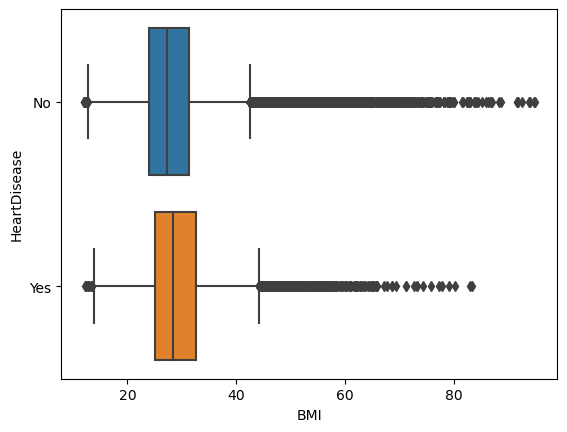

In [21]:
sns.boxplot(x = "BMI", y = "HeartDisease", data = heart_df)

PhysicalActivity and AlcoholDrinking seem to have the strongest relationships with the response variable. This is indicated since both colors have boxes of significantly different heights. SleepTime and BMI seem to have the weakest relationships with the response variable. This is indicated by the large amount of overlap between the boxplots and the similarities between the outliers.

<Axes: xlabel='BMI', ylabel='Smoking'>

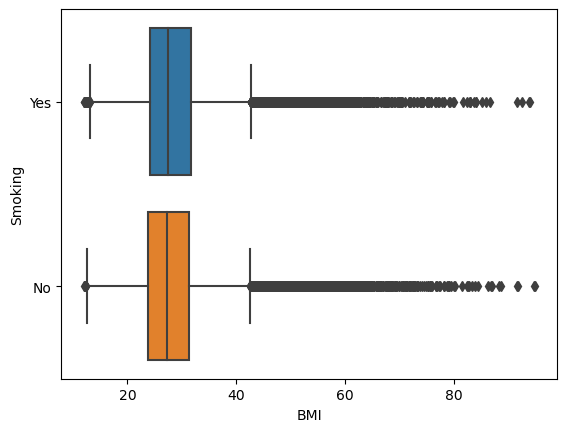

In [22]:
sns.boxplot(x = "BMI", y = "Smoking", data = heart_df)

<Axes: xlabel='SleepTime', ylabel='Smoking'>

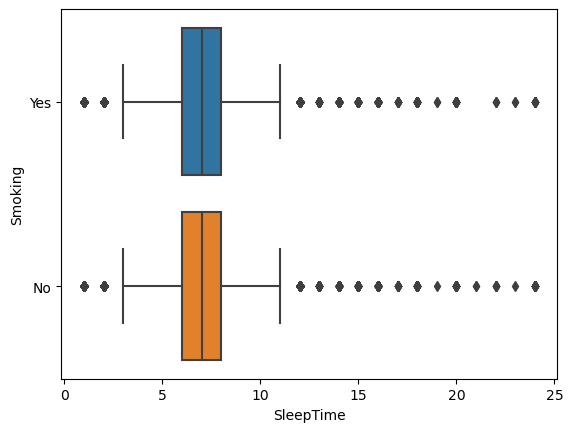

In [23]:
sns.boxplot(x = "SleepTime", y = "Smoking", data = heart_df)

<Axes: xlabel='Smoking'>

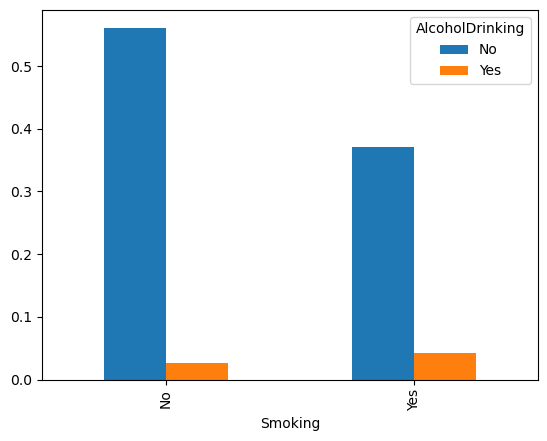

In [24]:
smoking_alc = pd.crosstab(heart_df["Smoking"], heart_df["AlcoholDrinking"], normalize = True)
smoking_alc.plot.bar()

<Axes: xlabel='Smoking'>

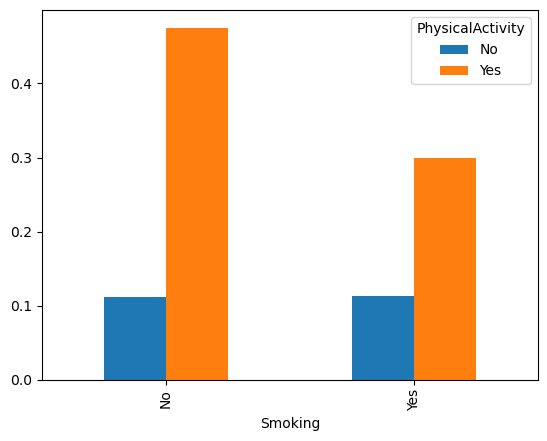

In [25]:
smoking_act = pd.crosstab(heart_df["Smoking"], heart_df["PhysicalActivity"], normalize = True)
smoking_act.plot.bar()

<Axes: xlabel='BMI', ylabel='AlcoholDrinking'>

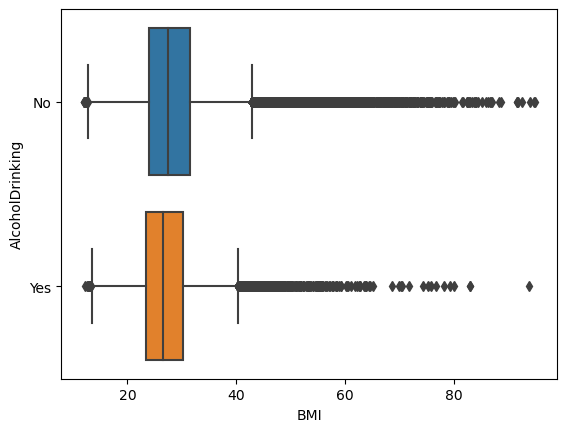

In [26]:
sns.boxplot(x = "BMI", y = "AlcoholDrinking", data = heart_df)

<Axes: xlabel='SleepTime', ylabel='AlcoholDrinking'>

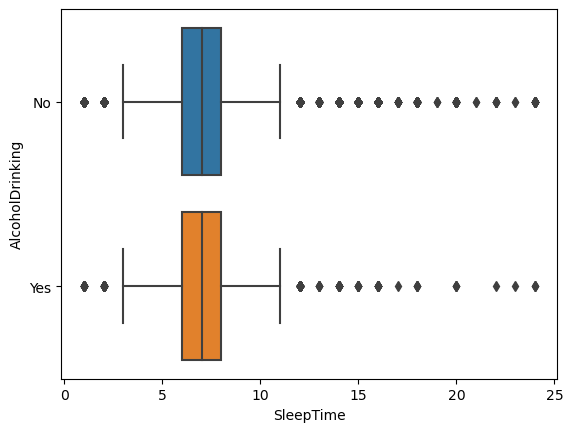

In [27]:
sns.boxplot(x = "SleepTime", y = "AlcoholDrinking", data = heart_df)

<Axes: xlabel='AlcoholDrinking'>

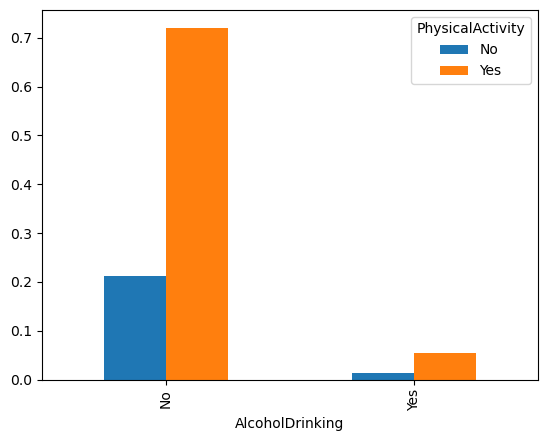

In [28]:
alc_act = pd.crosstab(heart_df["AlcoholDrinking"], heart_df["PhysicalActivity"], normalize = True)
alc_act.plot.bar()

<Axes: xlabel='BMI', ylabel='PhysicalActivity'>

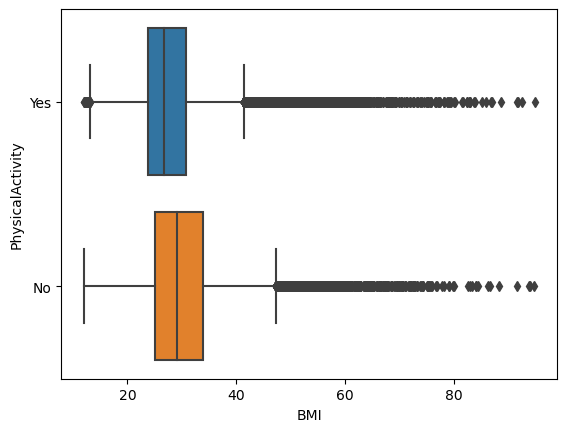

In [29]:
sns.boxplot(x = "BMI", y = "PhysicalActivity", data = heart_df)

<Axes: xlabel='SleepTime', ylabel='PhysicalActivity'>

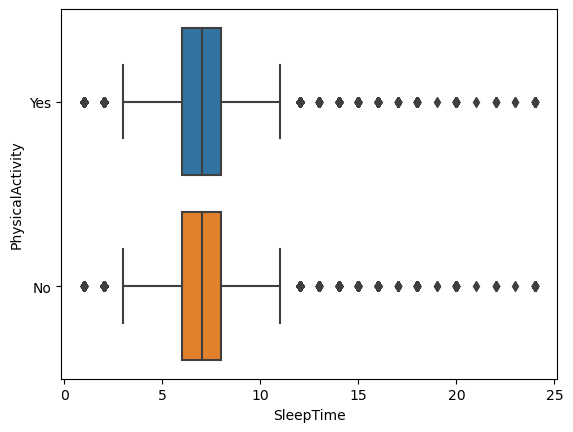

In [30]:
sns.boxplot(x = "SleepTime", y = "PhysicalActivity", data = heart_df)

,BMI,SleepTime
BMI,1.000000,-0.051822
SleepTime,-0.051822,1.000000


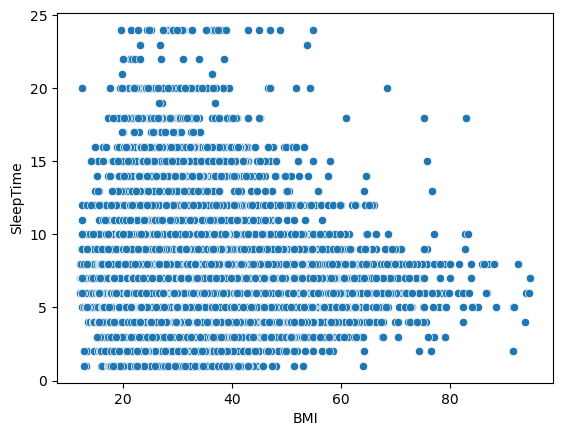

In [32]:
sns.scatterplot(x = "BMI", y = "SleepTime", data = heart_df)
heart_df[["BMI", "SleepTime"]].corr()

There are a three pairs of explanatory variables that seem to have strong relationships: smoking and alcoholdrinking, smoking and physicalactivity, and alcoholdrinking and physicalactivity. This is indicated since both colors have boxes of significantly different heights; this indicates a strong association.

<Axes: xlabel='BMI', ylabel='Smoking'>

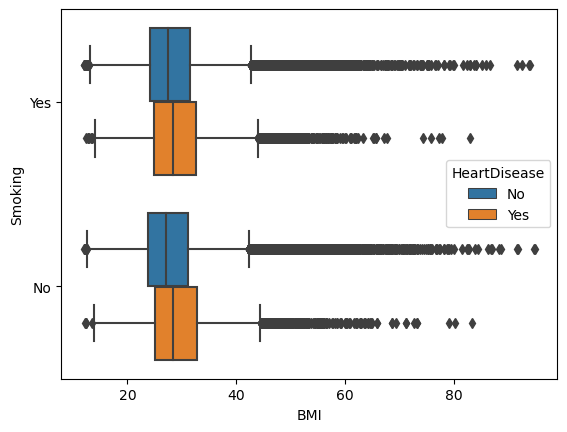

In [34]:
sns.boxplot(x = "BMI", y = "Smoking", hue = "HeartDisease", data = heart_df)

<Axes: xlabel='SleepTime', ylabel='Smoking'>

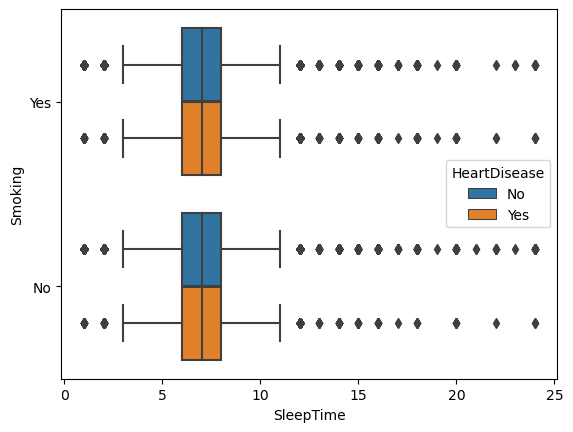

In [33]:
sns.boxplot(x = "SleepTime", y = "Smoking", hue = "HeartDisease", data = heart_df)

<Axes: xlabel='BMI', ylabel='AlcoholDrinking'>

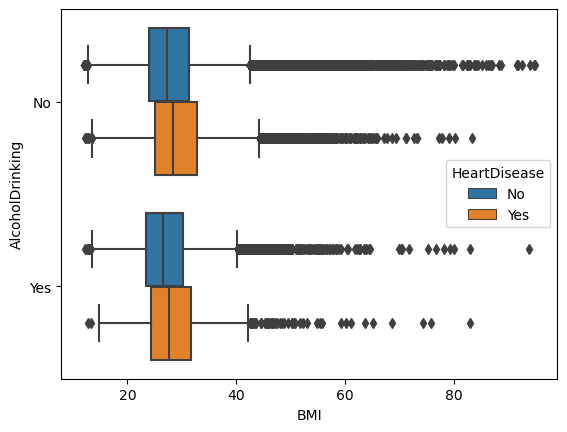

In [35]:
sns.boxplot(x = "BMI", y = "AlcoholDrinking", hue = "HeartDisease", data = heart_df)

<Axes: xlabel='SleepTime', ylabel='AlcoholDrinking'>

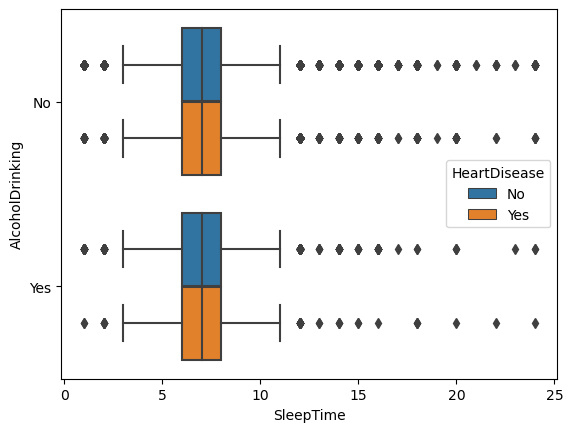

In [36]:
sns.boxplot(x = "SleepTime", y = "AlcoholDrinking", hue = "HeartDisease", data = heart_df)

<Axes: xlabel='BMI', ylabel='PhysicalActivity'>

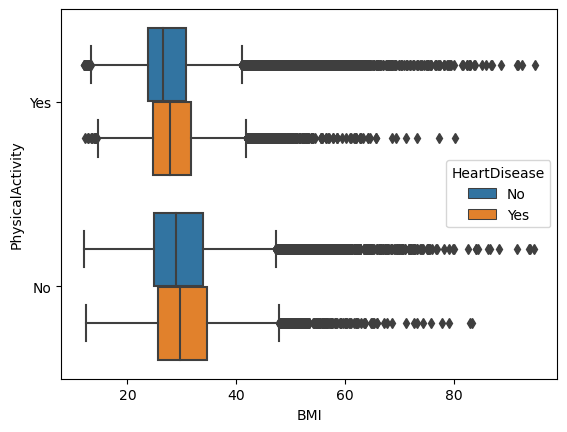

In [37]:
sns.boxplot(x = "BMI", y = "PhysicalActivity", hue = "HeartDisease", data = heart_df)

<Axes: xlabel='SleepTime', ylabel='PhysicalActivity'>

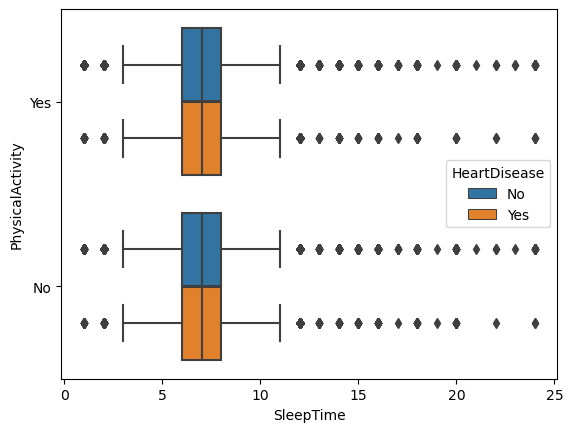

In [38]:
sns.boxplot(x = "SleepTime", y = "PhysicalActivity", hue = "HeartDisease", data = heart_df)

There does not seem to be an interaction in any pair of numerical and categorical explanatory variable in association with our response variable, heartdisease. This is demonstrated by the amount of overlap between the boxplots in every graph that we made. Since there is significant overlap, there is a weak association, indicating a lack of interaction between how any two explanatory variables impact our response variable.

## 5. Model Data Preprocessing

## 6. Feature Selection with k-Fold Cross-Validation

## 7. Best Model Discussion

## 8. Additional Analysis/Insight

## 9. Conclusion

## References